In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pima-indians-diabetes-database/diabetes.csv


In [2]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

<h1>Data Exploration</h1>

In [3]:
data = pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
bins = [21, 31, 41, 51, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior']

data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels)

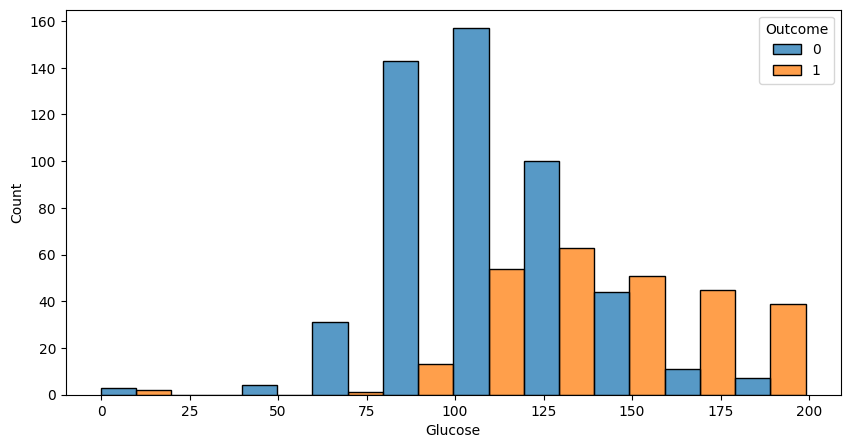

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Glucose", hue="Outcome", binwidth=20, multiple="dodge")
plt.show()

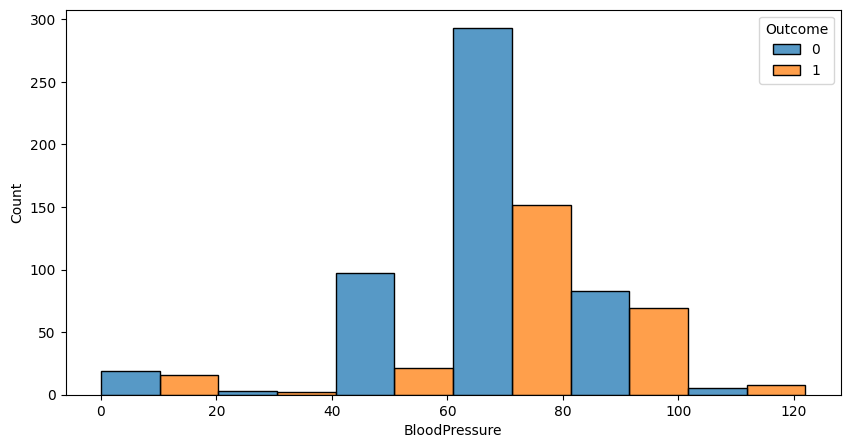

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="BloodPressure", hue="Outcome", binwidth=20, multiple="dodge")
plt.show()

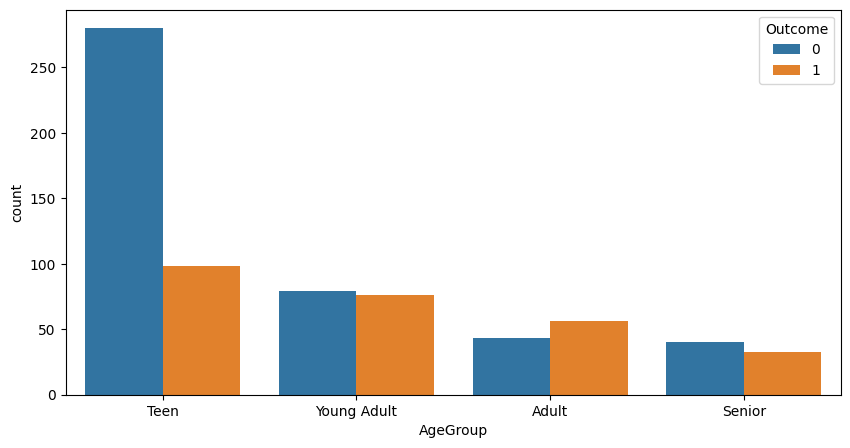

In [9]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x="AgeGroup", hue="Outcome")
plt.show()

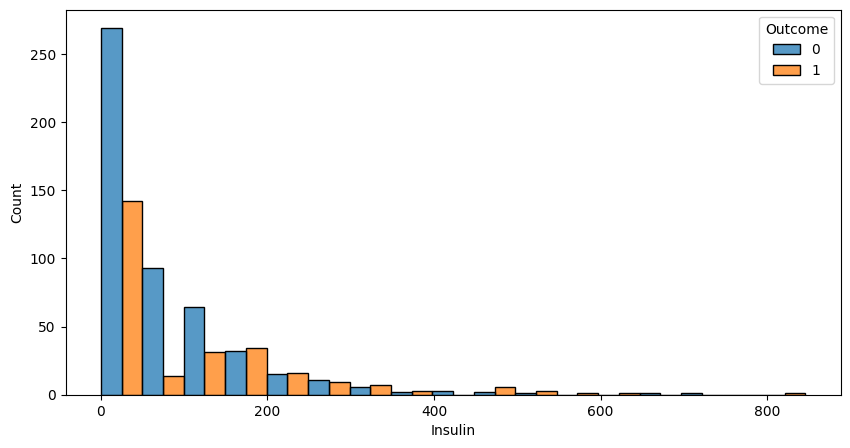

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="Insulin", hue="Outcome", binwidth=50, multiple="dodge")
plt.show()

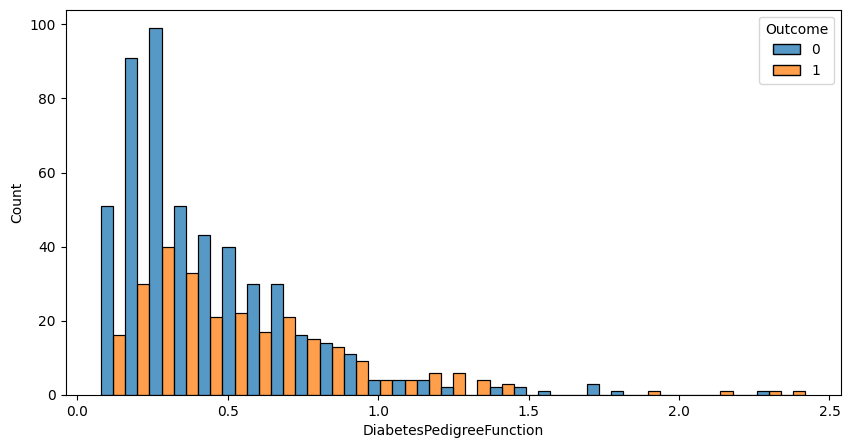

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x="DiabetesPedigreeFunction", hue="Outcome", multiple="dodge")
plt.show()

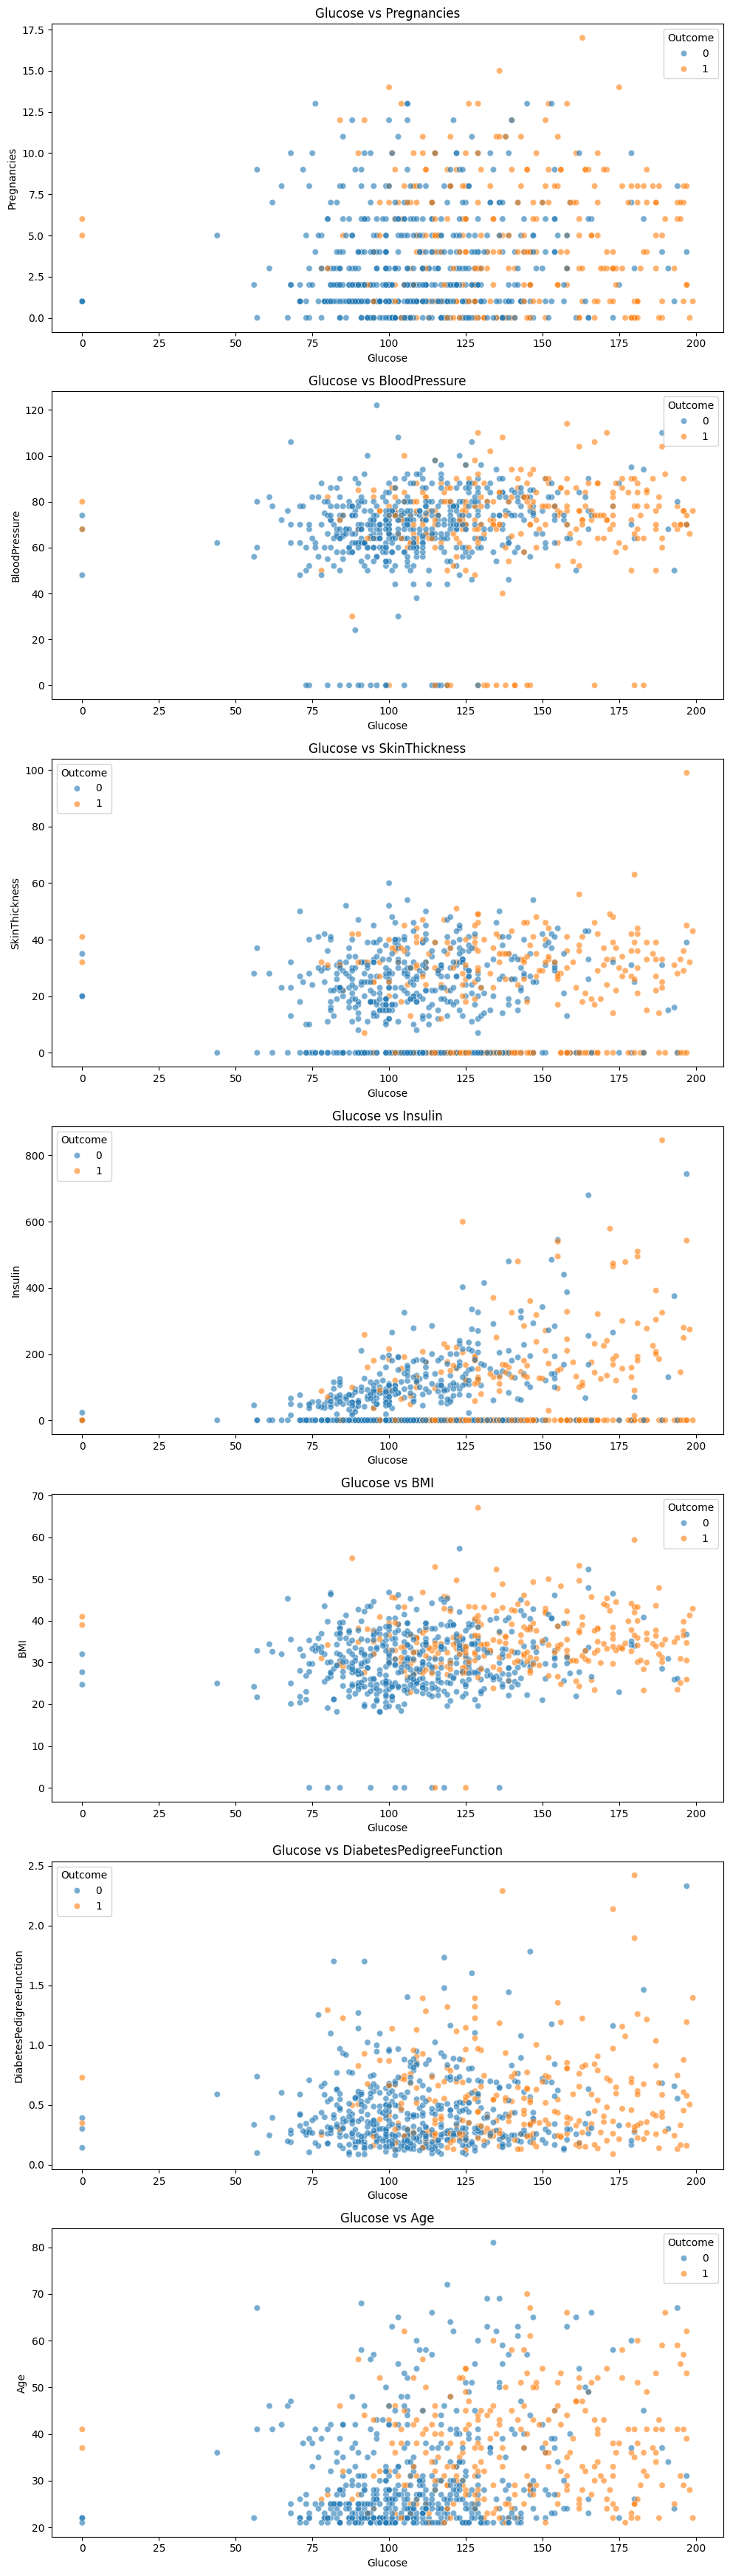

In [12]:
import math

y_cols = [col for col in data.columns if col not in ['Glucose', 'Outcome', 'AgeGroup']]

n_cols = 1
n_rows = math.ceil(len(y_cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 5 * n_rows))
axes = axes.flatten()

for i, col in enumerate(y_cols):
    sns.scatterplot(data=data, x='Glucose', y=col, hue='Outcome', alpha=0.6, ax=axes[i])
    axes[i].set_title(f'Glucose vs {col}')

for i in range(len(y_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

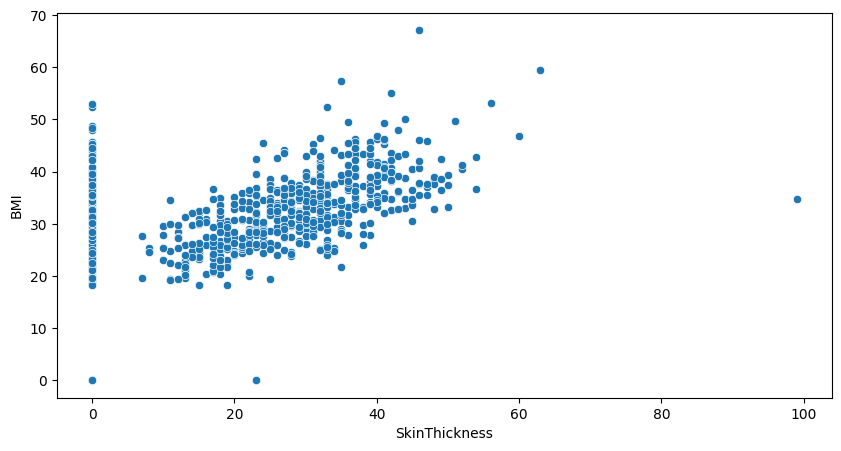

In [13]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="SkinThickness", y="BMI")
plt.show()

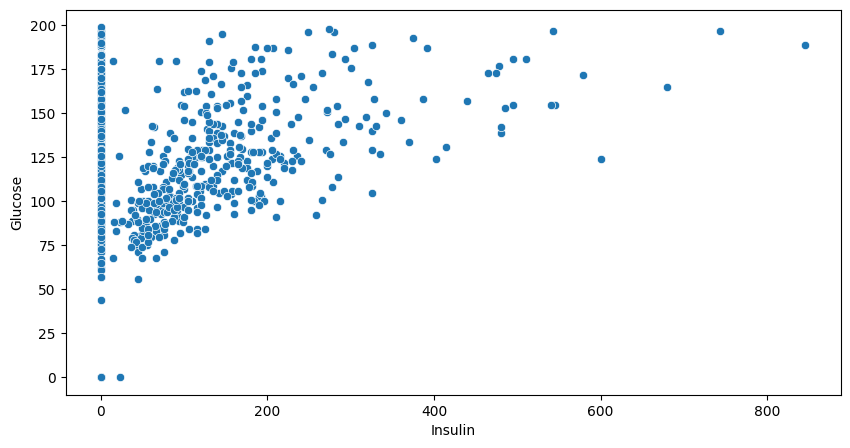

In [14]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=data, x="Insulin", y="Glucose")
plt.show()

<h1>Data Cleaning</h1>

In [15]:
print("no. of zeros")
for col in data.columns:
    print(col,":",len(data[data[col] == 0]))

no. of zeros
Pregnancies : 111
Glucose : 5
BloodPressure : 35
SkinThickness : 227
Insulin : 374
BMI : 11
DiabetesPedigreeFunction : 0
Age : 0
Outcome : 500
AgeGroup : 0


In [16]:
zero_to_na_col = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in zero_to_na_col:
    data[col] = data[col].replace(0, np.nan)

In [17]:
from sklearn.model_selection import train_test_split
X = data.drop('Outcome', axis=1)
y = data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Data Preprocessing</h1>

In [18]:
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_cols = [col for col in data.columns if col not in ['Outcome', 'AgeGroup']]
cat_cols = ['AgeGroup']

imputer = KNNImputer(n_neighbors=5)

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('imputer', imputer),
    ('reserved_imputer', SimpleImputer(strategy='median'))
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder())
])

transformer = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [19]:
X_train_prepared = transformer.fit_transform(X_train)
X_test_prepared = transformer.transform(X_test)

<h1>Train model</h1>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [21]:
log_reg_pipeline = Pipeline([
    
])

param_grid = {
    'C': [0.01, 0.1, 0.5, 1, 3, 10, 100],
    'max_iter': [200, 500],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

grid_search_log = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5)
grid_search_log.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.01, 0.1, 0.5, 1, 3, 10, 100],
                         'max_iter': [200, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [22]:
grid_search_log.best_params_

{'C': 0.1, 'max_iter': 200, 'penalty': 'l2', 'solver': 'liblinear'}

In [23]:
grid_search_log.best_score_

np.float64(0.7769025723044116)

In [24]:
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [2, 3, 5, 10],
    'min_samples_split': [2, 3, 5, 10] 
}

grid_search_rnd = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search_rnd.fit(X_train_prepared, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [2, 3, 5, 10],
                         'min_samples_split': [2, 3, 5, 10],
                         'n_estimators': [100, 200, 500]})

In [25]:
grid_search_rnd.best_params_

{'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 500}

In [26]:
grid_search_rnd.best_score_

np.float64(0.7703985072637611)

In [27]:
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
log_clf = LogisticRegression(solver="liblinear", C=0.1, max_iter=200, penalty='l2', random_state=42)
rnd_clf = RandomForestClassifier(n_estimators=500, max_depth=3, min_samples_split=5, random_state=42)
svm_clf = SVC(gamma="scale", probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft'
)

voting_clf.fit(X_train_prepared, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=0.1, max_iter=200,
                                                 random_state=42,
                                                 solver='liblinear')),
                             ('rf',
                              RandomForestClassifier(max_depth=3,
                                                     min_samples_split=5,
                                                     n_estimators=500,
                                                     random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(voting_clf, X_train_prepared, y_train, cv=5, scoring="accuracy")
scores.mean()

np.float64(0.7703851792616287)

In [29]:
from sklearn.metrics import accuracy_score
y_pred_log = grid_search_log.predict(X_test_prepared)
y_pred_rnd = grid_search_rnd.predict(X_test_prepared)
y_pred_voting = voting_clf.predict(X_test_prepared)

print("log predict:", accuracy_score(y_test, y_pred_log))
print("rnd_forest predict:", accuracy_score(y_test, y_pred_log))
print("voting predict:", accuracy_score(y_test, y_pred_voting))

log predict: 0.7727272727272727
rnd_forest predict: 0.7727272727272727
voting predict: 0.7727272727272727


              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



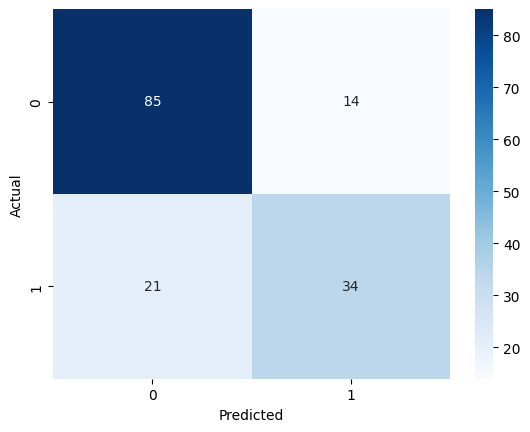

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

print(classification_report(y_test, y_pred_rnd))

cm = confusion_matrix(y_test, y_pred_rnd)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()